<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/homework/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Homework guideline
- The deadline is Oct 30th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Modified MNIST
I modified the the original MNIST gray-scale image dataset, where samples of digit 9 belong to class 1, and otherwise class 0. Now it becomes binary logistic regression. 
It contains a training set of images $\texttt{Xtr}$ with labels $\texttt{Ytr}$ and a testing set
of images $\texttt{Xte}$ with labels $\texttt{Yte}$. There are 6000 samples in training sets and 1000 samples in testing sets.

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))

11501568/11490434 [==============================] - 0s 0us/step
Xtr: (6000, 28, 28)
Ytr: (6000,)
Xte: (1000, 28, 28)
Yte: (1000,)


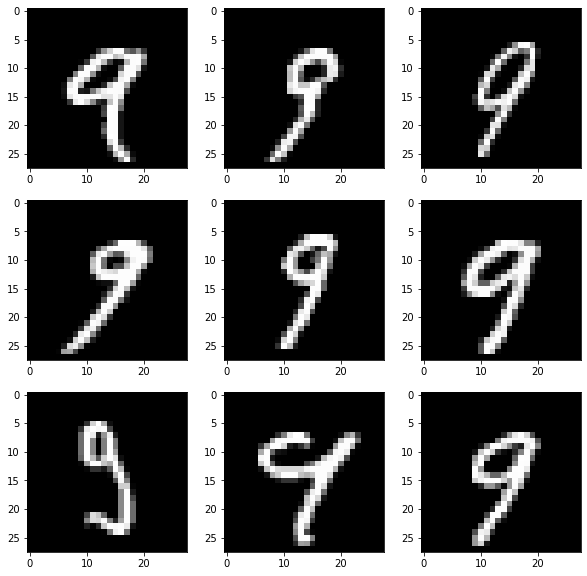

In [3]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
index = where(Ytr>0)[0]
for i in range(9):
    axs[i].imshow(Xtr[index[i]], cmap=pyplot.get_cmap('gray'))

## Q1: Logistic regression (20pt)

---


### 1. Data preparation for training and testing (5pt)
Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Please count the number of 9 out of these 6000 training set. What is the dimension of the matrix $\mathbf{X}$. Don't forget to do the same preparation for the testing data. 

In [5]:
 #@title Q1.1 your code starts here

#Training
x=reshape(Xtr, [6000,784])
x_ones=np.ones((6000,1))
X=np.column_stack((x_ones,x))

y=Ytr

print(f'Dimension of X: {X.shape}')
print(f'Size of y: {y.shape[0]}')
print(f'Training set has {int(sum(y))} "9s"\n')

#Testing
x_test=reshape(Xte,[1000,784])
x_ones_test=np.ones((1000,1))
X_test=np.column_stack((x_ones_test,x_test))

y_test=Yte

print(f'Dimension of X_test: {X_test.shape}')
print(f'Size of y_test: {y_test.shape[0]}')
print(f'Testing set has {int(sum(y_test))} "9s"')


Dimension of X: (6000, 785)
Size of y: 6000
Training set has 601 "9s"

Dimension of X_test: (1000, 785)
Size of y_test: 1000
Testing set has 94 "9s"


### **Your Answer:**

The training set has 601 9's. The dimension of X is (6000 , 785).


---
### 2. Logistic regression (15pt)

Perform logistic regression with the sigmoid activation function using **mini-batches descent method**. The mini-batch size is 25, the learning rate is $\eta_t = \frac{1}{(1+2t)^3}$ and total iteration number is $50$. You might need to restart the training with better initial conditions. Modify my code to accomodate it. 

Please use the testing set to validate the logistic regression model. What is the test error rate?  Could you plot several pictures that logistic regression model misclassified the digit 9. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Test Error for Logistic Regression is 0.094

Few Misclassified Digits in Logistic Regression


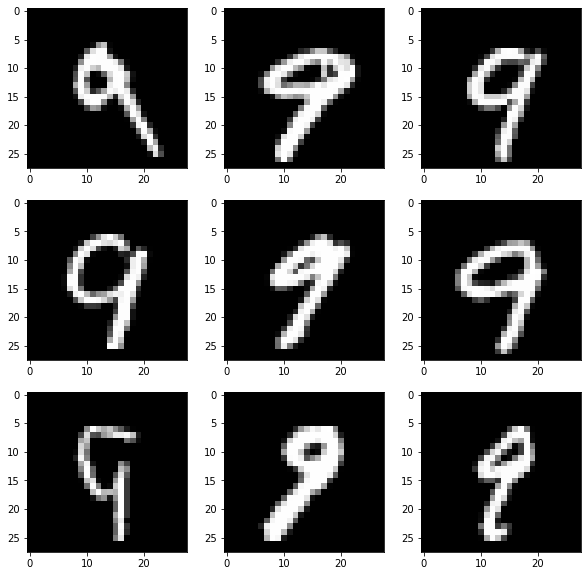

In [6]:
#@title Q1.2 your code starts here

def predict(X, w):
	z = w.dot(X)
	return 1.0 / (1.0 + exp(-z))
 
#learning rate is 1/(1+2t)^3
n_iter = 50
n_span = arange(n_iter)
l_rate_span = 1/((1+2 * n_span)**3)

def train_weights(X, y, l_rate_span, n_iter, weights, batch_size, threshold=0.002):

  n,m = X.shape

  for iter in range(n_iter):
    l_rate   = l_rate_span[iter]
    sum_error = 0
    arr=arange(n)
    np.random.shuffle(arr)

    for i in range(int(n/batch_size)):
      batch_sum = 0
      mini_arr=arr[i*batch_size:(i+1)*batch_size]

      for j in mini_arr:
        pred = predict(X[j,:], weights)
        error = pred - y[j]
        sum_error += error**2
        batch_sum += error*X[j,:]
  
      weights = weights - (l_rate/batch_size) * batch_sum
    
    #print(f'At interation {iter}, error is {sum_error}')

    if sum_error<threshold:
      break

  return weights

#initializing initial weights
IC=train_weights(X, y, l_rate_span, 50, np.random.random_sample(785), 25)

#trained weights
w=train_weights(X, y, l_rate_span, 50, IC, 25)

#test prediction
y_pred = predict(w,X_test)

y_pred[y_pred>=1/2]=1
y_pred[y_pred<1/2]=0

#test error rate:
print(f'Test Error for Logistic Regression is {norm(y_test - y_pred,0)/1000}\n')

#Misclassifications of the digit 9
print('Few Misclassified Digits in Logistic Regression')
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
index = where(y_test - y_pred!=0)[0]
for i in range(9):
    axs[i].imshow(Xte[index[i]], cmap=pyplot.get_cmap('gray'))

### **Your Answer:**

Test error for Logistic Regression is subject to change due to randomization. However, the printed statement above is to account for that change. Therefore, reported test error and a few misclassified digits can be found in the above printed statements and plots.






## Q2: Support Vector Machine (50pt)


---

### 1. Data preparation for training and testing (5pt)
Remember in SVM we move the interception out and define the class label is $\pm1$. Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Don't forget to do the same preparation for the testing data. 

Can you impose the hard margin classifier for this problem? Why or why not?


In [7]:
 #@title Q2.1 your code starts here

#Training Error for Logistic Regression

IC_train=train_weights(X, y, l_rate_span, 50, np.random.random_sample(785), 25)
w_train=train_weights(X, y, l_rate_span, 50, IC, 25)
y_pred_train = predict(w,X)
y_pred_train[y_pred_train>=1/2]=1
y_pred_train[y_pred_train<1/2]=0

print(f'Training error rate is {norm(y - y_pred_train,0)/6000}\n')

X_=x
X_test_=x_test

Ytr[Ytr==0]=-1
Yte[Yte==0]=-1

y_=Ytr
y_test_=Yte

print(f'Dimension of X_: {X_.shape}')
print(f'Dimension of X_test_: {X_test_.shape}')

print(f'Size of y_: {y_.shape[0]}')
print(f'Size of y_test_: {y_test_.shape[0]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Training error rate is 0.10016666666666667

Dimension of X_: (6000, 784)
Dimension of X_test_: (1000, 784)
Size of y_: 6000
Size of y_test_: 1000


### **Your Answer:**

You will not be able to impose the hard margin classifier for this problem because the data is not separable. The training error rate for logistic regression is not 0 (can be observed above printed statements), which it should be if it were separable.



---


### 2. Soft Margin with Hinge Loss (15pt)
Perform the soft margin with hinge loss using stochastic gradient descent method. 
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in \mathbb{R}} \lambda\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\} +\frac{1}{2} \|\mathbf{w}\|_2^2 }$$
The learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [8]:
 #@title Q2.2 your code starts here

L=[10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

def LOSS_f(X,y,w,w0,lambda_param):
   N,d = X.shape
   LOSS = 1/2 * norm(w)**2
   for i in range(N):
     condition = 1 - y[i] * (w.dot(X[i,:])+w0)
     LOSS = LOSS + lambda_param * max(condition, 0)
   return LOSS

def predict(x, w, w0):
	activation = x.dot(w)+w0

	return activation
	#return 1 if activation >= 0.0 else -1

n_iter = 100
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)

def train_weights(X, y, learning_rate_span,lambda_param, n_iter):
  N,d = X.shape
  w   = np.random.random_sample(784)
  w[1] = 2
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] ) 
    #print(iter)
  return w, w0

errors = []
for l in L:
  w,w0 = train_weights(X_, y_, learning_rate_span, l, n_iter)
  y_p = predict(X_test_, w, w0)
  y_p[y_p>=0]=1
  y_p[y_p<=0]=-1
  test_error = norm(y_p-y_test_,0)/1000
  errors.append(test_error)
  print(f'For l = {l}, test error is {test_error}')

print(f'\nOptimal lambda parameter for Soft Margin with Hinge Loss is {L[errors.index(min(errors))]} with test error {errors[errors.index(min(errors))]}')

For l = 0.0001, test error is 0.093
For l = 0.001, test error is 0.042
For l = 0.01, test error is 0.045
For l = 0.1, test error is 0.112
For l = 1, test error is 0.056
For l = 10, test error is 0.057
For l = 100, test error is 0.067
For l = 1000, test error is 0.074
For l = 10000, test error is 0.06

Optimal lambda parameter for Soft Margin with Hinge Loss is 0.001 with test error 0.042


### **Your Answer:**

Optimal parameter $\lambda$ with corresponding test error for SMHL is subject to change due to randomization. However, the printed statement above is to account for that change. Therefore, reported test error rates and optimal parameter $\lambda$ can be found in the above printed statements.



---


### 3. Prepare for soft margin with log loss (10pt)
Please compute the following two gradient:
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)= $$

$$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=$$

### **Your Answer:**

Using the following derivative rules for $\log$ and $e$,

\\

For function $f(x)$,

$\nabla_x\log{f(x)} = \frac{1}{f(x)}f'(x)$ and $\nabla_x e^{f(x)} = f'(x)e^{f(x)}$

\\

we have the follow:

$\begin{equation}
\begin{aligned}
\mathcal \nabla_\mathbf{w} \log(1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}) &= \frac{1}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}[-y^{(i)}x^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}]
\\
\\
& = \frac{-y^{(i)}x^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}
\\
\\
& = \frac{-y^{(i)}x^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}\frac{e^{y^{(i)}(w^Tx^{(i)}+w_o)}}{e^{y^{(i)}(w^Tx^{(i)}+w_o)}}
\\
\\
&= \frac{-y^{(i)}x^{(i)}}{e^{y^{(i)}(w^Tx^{(i)}+w_o)}+1}
\end{aligned}
\end{equation}$

\\

$\begin{equation}
\begin{aligned}
\mathcal \nabla_{w_o} \log(1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}) &= \frac{1}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}[-y^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}]
\\
\\
& = \frac{-y^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}
\\
\\
& = \frac{-y^{(i)}e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}{1 + e^{-y^{(i)}(w^Tx^{(i)}+w_o)}}\frac{e^{y^{(i)}(w^Tx^{(i)}+w_o)}}{e^{y^{(i)}(w^Tx^{(i)}+w_o)}}
\\
\\
&= \frac{-y^{(i)}}{e^{y^{(i)}(w^Tx^{(i)}+w_o)}+1}
\end{aligned}
\end{equation}$



---


### 4. Soft Margin with Log Loss (20pt)
Perform the soft margin with log loss using stochastic gradient descent method.
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in\mathbb{R}}  \lambda \sum_{i=1}^N\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)  +\frac{1}{2}\|\mathbf{w}\|_2^2 } $$
Similarly, the learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [9]:
 #@title Q2.4 your code starts here

def LOG_f(X,y,w,w0,lambda_param):
   N,d = X.shape
   LOG = 1/2 * norm(w)**2
   for i in range(N):
     condition = 1 + np.exp(y[i] * (w.dot(X[i,:])+w0))
     LOG = LOG + lambda_param * condition
   return LOG

def train_weights(X, y, learning_rate_span,lambda_param, n_iter=100):
  N,d = X.shape
  w   = np.random.random_sample(784)
  w[1] = 2
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
      w  = w - learning_rate * ( (-lambda_param * y[i] * X[i,:]) / (1 + np.exp(y[i] * (w.dot(X[i,:]) + w0) ) ) + w)
      w0 = w0 - learning_rate * ( (-lambda_param * y[i]) / (1 + np.exp(y[i] * (w.dot(X[i,:]) + w0) ) ) ) 
    #print(iter)
  return w, w0

errors2 = []
for l in L:
  w,w0 = train_weights(X_, y_, learning_rate_span, l, n_iter)
  y_p = predict(X_test_, w, w0)
  y_p[y_p>=0]=1
  y_p[y_p<=0]=-1
  test_error = norm(y_p-y_test_,0)/1000
  errors2.append(test_error)
  print(f'For l = {l}, test error is {test_error}')

print(f'\nOptimal lambda parameter for Soft Margin with Log Loss is {L[errors2.index(min(errors2))]} with test error {errors2[errors2.index(min(errors2))]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


For l = 0.0001, test error is 0.097
For l = 0.001, test error is 0.045
For l = 0.01, test error is 0.04
For l = 0.1, test error is 0.05
For l = 1, test error is 0.107
For l = 10, test error is 0.085
For l = 100, test error is 0.055
For l = 1000, test error is 0.056
For l = 10000, test error is 0.072

Optimal lambda parameter for Soft Margin with Log Loss is 0.01 with test error 0.04


### **Your Answer:**

Optimal parameter $\lambda$ with corresponding test error for SMLL is subject to change due to randomization. However, the printed statement above is to account for that change. Therefore, reported test error rates and optimal parameter $\lambda$ can be found in the above printed statements.


---


### 5. Optional problem: try the kernel trick 
You can try to use the kernel trick with various different $\sigma^2$ and $\lambda$. What is your difficulty and your findings here? 

### **Your Answer:**





## Q3: $k$-NN on Iris data (30pt)


---

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a $150\times4$ matrices.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.




In [13]:
# you are not allowed to use other package and modules 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify=y)

print(f'Dimensions of X_train: {X_train.shape}')
print(f'Dimensions of X_test: {X_test.shape}')

Dimensions of X_train: (60, 4)
Dimensions of X_test: (90, 4)


## 1. Use 5-fold cross validation to find optimal $k$ (20pt)
Here we only use the training dataset, `X_train` and `y_train`. We will test $k$ range from 1 to 21. For each $k$, we will use 5-fold cross validation to estimate the average misclassification rate. Please plot the average misclassification rate verse $k$ and find the optimal $k$. 

Text(0.5, 1.0, '5-fold cross validation, N_train = 60')

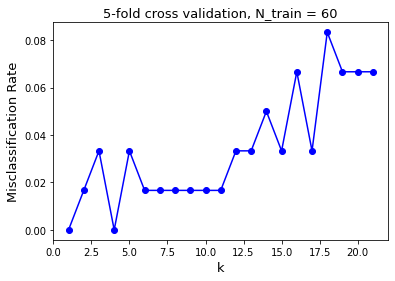

In [14]:
 #@title Q3.1 your code starts here

def myknn_predict(k, x_train, y_train, x_test):
  labelEst = np.zeros(x_test.shape[0])
  for i, x in enumerate(x_test):
    dist            = norm(x_train - x, axis=1) # 2-norm
    dist_sort_index = argsort(dist)
    neigh_labels    = y_train[dist_sort_index[0:k]]
    labelEst[i]     = argmax(bincount(neigh_labels)) # simple majority rule
  return labelEst

scores     = []
CV         = 5
N_train    = y_train.shape[0]
batch      = N_train/CV
ks = range(1,22)

for k in ks:
  x_train_CV = split(X_train, CV)
  y_train_CV = split(y_train, CV)
  test_errs  = []
  for i in range(CV):
    index = delete(arange(CV),i)
    x_train_CV_i = vstack([x_train_CV[j] for j in index])
    y_train_CV_i = hstack([y_train_CV[j] for j in index])
    x_test_CV_i  = x_train_CV[i]
    y_test_CV_i  = y_train_CV[i]

    y_test_CV_i_predicted = myknn_predict(k, x_train_CV_i, y_train_CV_i, x_test_CV_i)
    test_errs.append(norm(y_test_CV_i_predicted - y_test_CV_i, 0)/batch)

  scores.append(mean(test_errs))  

plt.figure()
plt.plot(ks, scores, 'ko-', c='blue')
plt.xlabel('k', fontsize=13)
plt.ylabel('Misclassification Rate', fontsize=13)
plt.title('5-fold cross validation, N_train = 60', fontsize=13)

## 2. Use optimal $k$ to predict in the test dataset (10pt)
Now we have the optimal $k$. We will apply the optimal $k$-NN on the test dataset and please estimate the misclassification rate in the test dataset. 

In [15]:

x_test_CV = split(X_test, CV)
y_test_CV = split(y_test, CV)
test_errs  = []
for i in range(CV):
  index = delete(arange(CV),i)
  x_Test_CV_i = vstack([x_test_CV[j] for j in index])
  y_Test_CV_i = hstack([y_test_CV[j] for j in index])
  x_test_CV_i  = x_test_CV[i]
  y_test_CV_i  = y_test_CV[i]

  y_test_CV_i_predicted = myknn_predict(scores.index(min(scores))+1, x_Test_CV_i, y_Test_CV_i, x_test_CV_i)
  test_errs.append(norm(y_test_CV_i_predicted - y_test_CV_i, 0)/batch)

print(f'For optimal k = {scores.index(min(scores))+1}, the misclassification rate is {mean(test_errs)}')

For optimal k = 1, the misclassification rate is 0.08333333333333333


### **Your Answer:**

Optimal $k$ with corresponding misclassification rate is subject to change due to randomization. However, the printed statement above is to account for that change. Therefore, reported optimal $k$ can be found in the above printed statements.